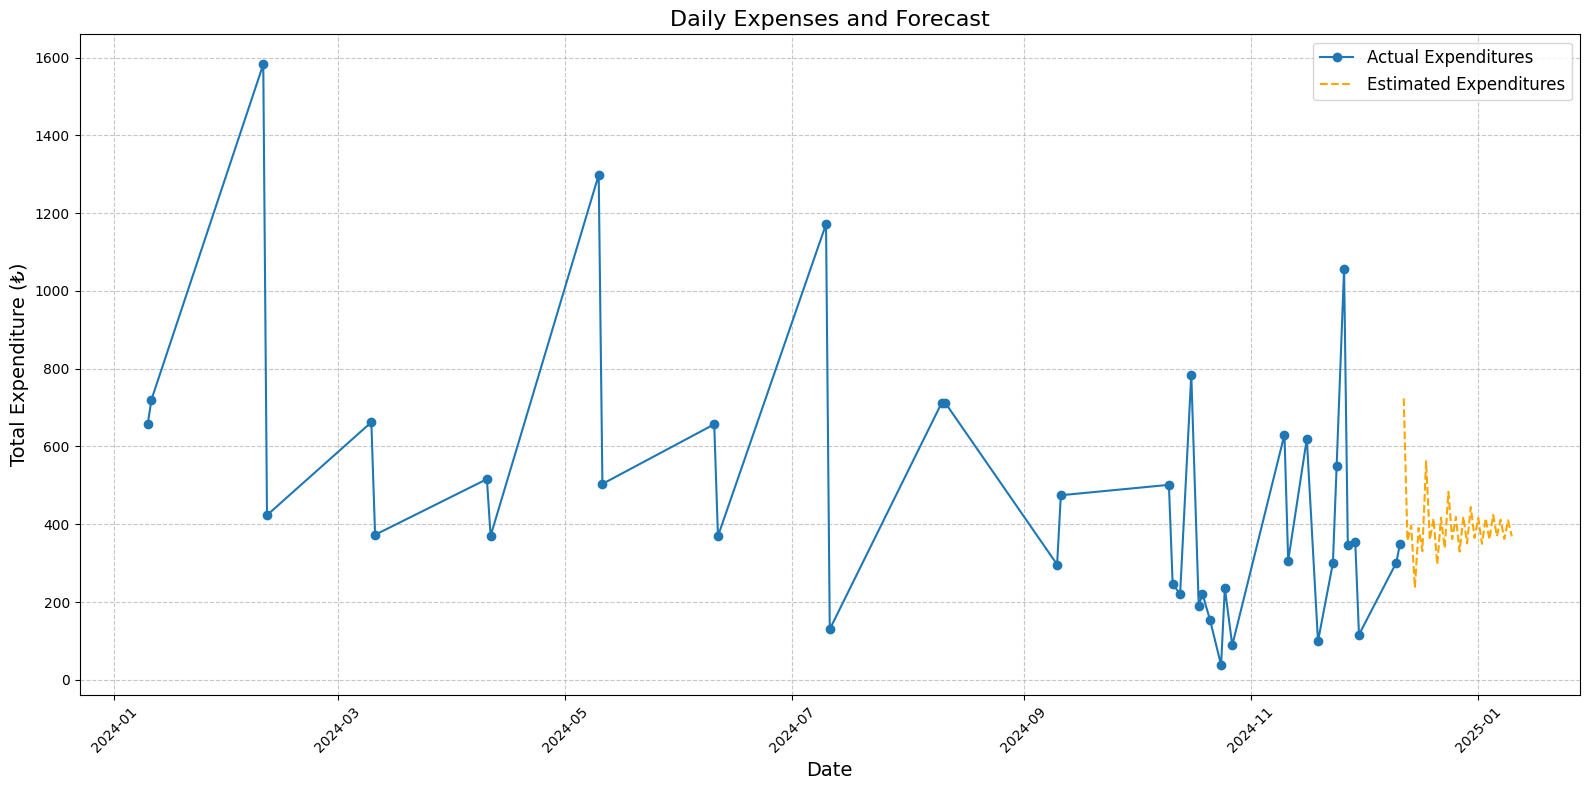

In [5]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

file_path = 'iki_aylik_harcamalar_kuruslu_duzenli.xlsx'
df = pd.read_excel(file_path)

df['Tarih'] = pd.to_datetime(df['Tarih'], errors='coerce')
df = df.dropna(subset=['Tarih'])
daily_expenses = df.groupby('Tarih')['Ücret'].sum().reset_index()

model = ARIMA(daily_expenses['Ücret'], order=(5, 1, 0))
fitted_model = model.fit()

forecast_steps = 30
forecast = fitted_model.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=daily_expenses['Tarih'].iloc[-1] + pd.Timedelta(days=1),
                               periods=forecast_steps, freq='D')

forecast_df = pd.DataFrame({'Tarih': forecast_index, 'Tahmin': forecast})

plt.figure(figsize=(16, 8))
plt.plot(daily_expenses['Tarih'], daily_expenses['Ücret'], label='Actual Expenditures', marker='o')
plt.plot(forecast_df['Tarih'], forecast_df['Tahmin'], label='Estimated Expenditures', linestyle='--', color='orange')
plt.title('Daily Expenses and Forecast', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Expenditure (₺)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
